In [1]:
import tensorflow as tf
import numpy as np
import src

In [9]:
problem = src.TSPProblem()

In [3]:
tf.reset_default_graph()
network = src.PointerNetwork('cfg')
network.makeGraph()
seqLen = network.maxTimeSteps
batchSize = network.batchSize

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [4]:
trainingParams = {}
trainingParams['batchSize'] = batchSize
trainingParams['length'] = seqLen
trainingParams['numCities'] = seqLen

losses = []

# train on numBatches batches of 100 samples each
saver = tf.train.Saver()
numBatches = 1000
with tf.Session() as sess:
    # initialize variables
    sess.run(tf.global_variables_initializer())
    
    # write out log for graph visualization
    writer = tf.summary.FileWriter('checkpoints/', sess.graph)

    for batch in range(numBatches):
        # make current batch of training data
        inputs = problem.makeBatch(trainingParams)
        trainingInputs, targets = problem.makeTargets(inputs)
        
        # apply one training step
        _, loss = sess.run([network.trainOp, network.loss], 
                           feed_dict={network.train: True,
                                      network.rawInputs: inputs,
                                      network.targets: targets,
                                      network.targetInputs: trainingInputs[:,:-1,:]})
        
        # keep track of the loss values
        losses.append(loss)
        
        if batch % 100 == 0 or batch == numBatches-1:
            
            # generate a test batch and output its accuracy and also a sample
            print('Batch: ' + str(batch))
            newInputs = problem.makeBatch(trainingParams)
            output = sess.run(network.decoderOutputs, feed_dict={network.train: False,
                                                                 network.rawInputs: newInputs})
            print(newInputs[0, :, :].T)
            print(newInputs[0, :, :][np.array(output).T[0]].T)
            print(problem.accuracy(solution=np.array(output).T, batchArray=newInputs))
            
            # save checkpoint
            if batch > 0:
                saver.save(sess, 'checkpoints/SortingPointerNetwork', global_step=network.globalStep)

Batch: 0
[[ 0.0694182   0.28653435  0.67151609  0.05835312  0.96098649]
 [ 0.63428083  0.92402423  0.44886724  0.59471751  0.41898492]]
[[ 0.0694182   0.28653435  0.05835312  0.67151609  0.96098649]
 [ 0.63428083  0.92402423  0.59471751  0.44886724  0.41898492]]
1.48705912446
Batch: 100
[[ 0.89019183  0.07163456  0.25337688  0.10093227  0.52468551]
 [ 0.36113082  0.80795358  0.50458678  0.56286661  0.0140203 ]]
[[ 0.89019183  0.52468551  0.10093227  0.25337688  0.07163456]
 [ 0.36113082  0.0140203   0.56286661  0.50458678  0.80795358]]
1.24840728082
Batch: 200
[[ 0.82004191  0.65646673  0.42374485  0.04826134  0.38668088]
 [ 0.17466808  0.72196487  0.87131235  0.79626031  0.3220555 ]]
[[ 0.82004191  0.38668088  0.65646673  0.42374485  0.04826134]
 [ 0.17466808  0.3220555   0.72196487  0.87131235  0.79626031]]
1.12938523641
Batch: 300
[[ 0.62427434  0.33537669  0.41932507  0.38585717  0.76485303]
 [ 0.76425469  0.2964961   0.48740162  0.60115937  0.89603912]]
[[ 0.62427434  0.33537669  

The above cells train the sorting problem according to max time in cfg (default is 5).

Now, look at the accuracy of using these network weights on sorting 15 numbers and see how the network performs.

In [2]:
tf.reset_default_graph()
problem = src.TSPProblem()
network = src.PointerNetwork('cfg')
network.maxTimeSteps = 15
network.batchSize = 100
network.makeGraph()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [3]:
trainingParams = {}
trainingParams['batchSize'] = network.batchSize
trainingParams['length'] = network.maxTimeSteps
trainingParams['numCities'] = network.maxTimeSteps

saver = tf.train.Saver()
with tf.Session() as sess:
    # load graph
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints/'))

    # generate a test batch and output its accuracy and also a sample
    newInputs = problem.makeBatch(trainingParams)
    output = sess.run(network.decoderOutputs, feed_dict={network.train: False,
                                                         network.rawInputs: newInputs})
    print(newInputs[0, :, :].T)
    print(newInputs[0, :, :][np.array(output).T[0]].T)
    print(problem.accuracy(solution=np.array(output).T, batchArray=newInputs))

INFO:tensorflow:Restoring parameters from checkpoints/SortingPointerNetwork-1000
[ 0.82315549  0.49065988  0.69225298  0.53604368  0.29623782  0.75034609
  0.86643699  0.59223617  0.65487109  0.40890342  0.63668566  0.88994951
  0.65376351  0.89327151  0.8289467 ]
[ 0.53604368  0.49065988  0.75034609  0.40890342  0.29623782  0.86643699
  0.65376351  0.8289467   0.69225298  0.59223617  0.88994951  0.82315549
  0.65487109  0.89327151  0.63668566]
1.63538045791


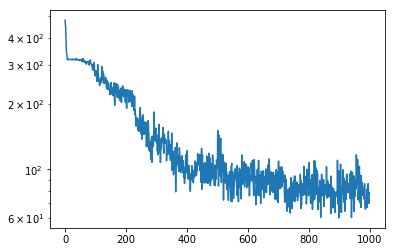

In [5]:
import matplotlib.pyplot as plt

plt.semilogy(losses)
plt.show()

In [9]:
import src
import numpy as np
problem = src.TSPProblem()

In [6]:
params = {}
params['batchSize'] = 1
params['numCities'] = 5
inp = problem.makeBatch(params)
sol = problem.getSolution(inp)

In [10]:
problem.accuracy(solution=np.array(output).T, batchArray=newInputs)

TypeError: object of type 'float' has no len()

In [6]:
            print(newInputs[0, :, :].shape)
            print(newInputs[0, :, :][np.array(output).T[0]].T.shape)

(5, 2)
(2, 5)


In [11]:
np.array(output).T[0]

array([0, 2, 3, 1, 4])